*Keywords:* Mental health, Age, Veteran status, Education, General Health, Statistical Analysis, Pearson's Chi-Square, Analysis of Variance, Correlation Matrix

# Project Overview and Objectives

**Project objective:** Analyze the relationship between mental health and age in adults between the ages of 18 and 99 in the United States.

**Research Question:** What ages experience the most "no good" mental health days?

**Null Hypothesis (H0):** There is no significant difference in the number of 'no good' mental health days reported across different age groups.

**Alternative Hypothesis (H1):** There is a significant difference in the number of 'no good' mental health days reported across different age groups. 

**Methodology:** This project employs a structured methodology consisting of (Data cleaning, Exploratory Data Analysis (EDA), and feature engineering). Following those steps, statistical analysis is conducted utilizing Pearson's Chi-Square, Analysis of Variance (ANOVA), and Correlation Matrix.

**Dataset:** Dataset from the Behavioral Risk Factor Suerveillance System (2018); also found on Kaggle

# Statistics
- 1 in 5 adults have a mental health condition; that is more than the population of New York and Florida combined, making up more than 40 million Americans (Mental Health America, 2023).
- In 2018, 19% of adults experienced a mental health illness (Terlizzi & Zablotsky, 2020).
- In 2019, 20% of adults were living with a mental health illness, and in 2020, the percentage increased to 40% (The Blackberry Center, 2020).
- The National Alliance on Mental Health Illness found that 50% of all lifetime mental illnesses begin at the age of 14, and 75% begin at the age of 24 (2023).

# Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
from imblearn.over_sampling import SMOTE
from scipy.stats import chi2_contingency
from imblearn.under_sampling import RandomUnderSampler

# Import Dataset

In [2]:
file_path = '/kaggle/input/behavioral-risk-factor-surveillance-system/LLCP2018.XPT'

BRFSS = pd.read_sas(file_path)

#### **Variables used in this study and questions that were asked:**

*These variables can be found in the codebook*
 - **VETERAN3  : Veteran**
    - Have you ever served on active duty in the United States Armed Forces, either in the regular military or in a National Guard or military reserve unit?
        - 1= Yes 
        - 2= No 
        - 7= Don't know/Not sure
        - 9= Refused
        - BLANK= Not asked or missing
 
 
 - **GENHLTH  : General Health**
     - Would you say that in general your health is: 
         - 1= Excellent
         - 2= Very Good
         - 3= Good
         - 4= Fair
         - 5= Poor
         - 7= Don't know/Not sure
         - 9= Refused
         - BLANK= Not asked or missing.
         
         
 - **EDUCA    : Education**
     - What is the highest grade or year of school you completed?
         - 1= Never attended school or only kindergarten
         - 2= Grades 1 through 8 (Elementary)
         - 3= Grades 9 through 11 (Some high school)
         - 4= Grade 12 or GED (High school graduate)
         - 5= College 1 year to 3 years (Some college or technical school)
         - 6= College 4 years or more (College graduate)
         - 9= Refused
         - BLANK= Not asked or missing
         
 - **_AGE80   : Age**
     - Imputed Age value collapsed above 80
         - 18-24 = Imputed Age 18 to 24
         - 25-29 = Imputed Age 25 to 29
         - 30-34 = Imputed Age 30 to 34
         - 35-39 = Imputed Age 35 to 39
         - 40-44 = Imputed Age 40 to 44
         - 45-49 = Imputed Age 45 to 49
         - 50-54 = Imputed Age 50 to 54
         - 55-59 = Imputed Age 55 to 59
         - 60-64 = Imputed Age 60 to 64
         - 65-69 = Imputed Age 65 to 69
         - 70-79 = Imputed Age 70 to 79
         - 80-99 = Imputed Age 80 to 99
         
         
 - **_MENT14D : Mental Health**
     - 3 level not good mental health status: 0 days, 1-13 days, 14-30 days.
         - 1 = Zero days when mental health not good
         - 2 = 1-13 days when mental health not good
         - 3 = 14+ days when mental health not good
         - 9 = Don't know/Refused/Missing

In [3]:
# Keep only selected variabels in the dataset
variables_to_keep = ['VETERAN3', 'GENHLTH', 'EDUCA', '_AGE80', '_MENT14D']
BRFSS_1 = BRFSS.loc[:, variables_to_keep]

print(BRFSS_1)

        VETERAN3  GENHLTH  EDUCA  _AGE80  _MENT14D
0            2.0      2.0    6.0    80.0       1.0
1            2.0      3.0    6.0    33.0       1.0
2            2.0      5.0    4.0    76.0       1.0
3            2.0      1.0    4.0    66.0       1.0
4            2.0      2.0    6.0    40.0       1.0
...          ...      ...    ...     ...       ...
437431       2.0      1.0    5.0    73.0       3.0
437432       2.0      1.0    6.0    65.0       1.0
437433       2.0      5.0    2.0    78.0       1.0
437434       2.0      4.0    6.0    78.0       2.0
437435       2.0      3.0    6.0    49.0       3.0

[437436 rows x 5 columns]


In [4]:
# Print the number of observations and variables
print("Number of observations:", BRFSS_1.shape[0])
print("Number of variables:", BRFSS_1.shape[1])

Number of observations: 437436
Number of variables: 5


# Data Cleaning

### Check missing values

In [5]:
# Select numeric values
numeric_columns = BRFSS_1.select_dtypes(include= ['int', 'float'])

# Check for missing numeric values
missing_num_values = numeric_columns.isna().sum()

print(missing_num_values)

VETERAN3    558
GENHLTH      25
EDUCA        34
_AGE80        0
_MENT14D      0
dtype: int64


In [6]:
# Calculate the median for each of the columns
veteran_median = BRFSS_1['VETERAN3'].median()
genhlth_median = BRFSS_1['GENHLTH'].median()
educa_median = BRFSS_1['EDUCA'].median()

# Create a dictionary with the median values for each column
median_dict = {
    'VETERAN3': veteran_median,
    'GENHLTH': genhlth_median,
    'EDUCA': educa_median
}

# Impute the missing values using the dictionary-style assignment
BRFSS_1.fillna(median_dict, inplace=True)

# Calculate the count of missing values in the columns after imputation
missing_num_values_after_imputation = BRFSS_1[['VETERAN3', 'GENHLTH', 'EDUCA']].isna().sum()

# Print the missing values count for each column
print(missing_num_values_after_imputation)

VETERAN3    0
GENHLTH     0
EDUCA       0
dtype: int64


### EDA, Outlier removal, and Feature Engineering

In [7]:
# Calculate z-scores for each column
z_scores = np.abs((BRFSS_1 - BRFSS_1.mean()) / BRFSS_1.std())

# Define a threshold for outlier detection
threshold = 3

# Find outliers
outliers = (z_scores > threshold).any(axis=1)

# Display rows containing outliers
print("Rows containing outliers:")
print(BRFSS_1[outliers])

Rows containing outliers:
        VETERAN3  GENHLTH  EDUCA  _AGE80  _MENT14D
19           7.0      2.0    4.0    78.0       2.0
38           2.0      5.0    9.0    80.0       9.0
46           2.0      5.0    6.0    62.0       9.0
61           9.0      1.0    6.0    50.0       1.0
75           2.0      3.0    5.0    46.0       9.0
...          ...      ...    ...     ...       ...
437107       2.0      1.0    4.0    31.0       9.0
437113       2.0      4.0    6.0    52.0       9.0
437143       2.0      4.0    2.0    68.0       9.0
437312       2.0      4.0    5.0    60.0       9.0
437420       2.0      4.0    4.0    49.0       9.0

[10577 rows x 5 columns]


In [8]:
# Statistical description including mean, median, and quartiles
description = BRFSS_1.describe(percentiles=[.25, .50, .75])

# Calculate mode
mode = BRFSS_1.mode().iloc[0]  # Mode might return multiple values, so we take the first one

# Transpose the description DataFrame
description = description.transpose()

# Add mode to description
description['mode'] = mode

# Print statistical description
print(description)

             count       mean        std   min   25%   50%   75%   max  mode
VETERAN3  437436.0   1.884861   0.449747   1.0   2.0   2.0   2.0   9.0   2.0
GENHLTH   437436.0   2.602518   1.109159   1.0   2.0   3.0   3.0   9.0   2.0
EDUCA     437436.0   4.941992   1.066642   1.0   4.0   5.0   6.0   9.0   6.0
_AGE80    437436.0  54.907714  17.413350  18.0  41.0  58.0  69.0  80.0  80.0
_MENT14D  437436.0   1.565088   1.170538   1.0   1.0   1.0   2.0   9.0   1.0


#### 'VETERAN3'

In [9]:
# Print unique categories in the 'VETERAN3' variable
print(BRFSS_1['VETERAN3'].unique())

[2. 1. 7. 9.]


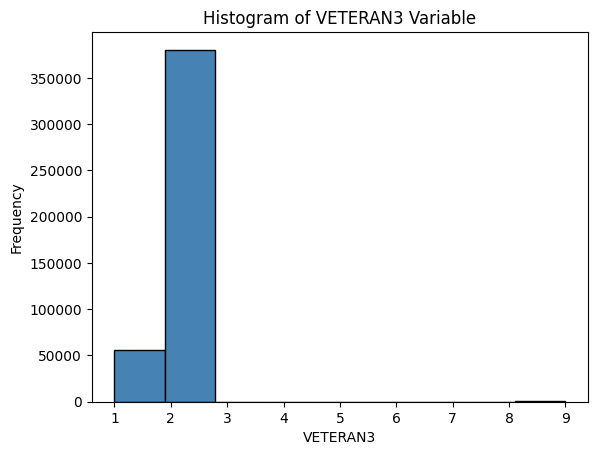

In [10]:
# Create a histogram
plt.hist(BRFSS_1['VETERAN3'], bins=9, color='steelblue', edgecolor='black')

# Add labels and title
plt.xlabel('VETERAN3')
plt.ylabel('Frequency')
plt.title('Histogram of VETERAN3 Variable')

# Show the plot
plt.show()

In [11]:
# Remove categories 7 and 9 from the 'VETERAN3' variable
BRFSS_1 = BRFSS_1[(BRFSS_1['VETERAN3'] != 7) & 
                           (BRFSS_1['VETERAN3'] != 9)]

# Print unique categories in the 'VETERAN3' variable after removal
print(BRFSS_1['VETERAN3'].unique())

[2. 1.]


In [12]:
#Convert to categorical where 1 = Yes & 2 = No
BRFSS_1['Veteran'] = BRFSS_1['VETERAN3'].replace({1: 'Yes', 2: 'No'})

# Print unique categories in the 'Veteran' variable after conversion
print(BRFSS_1['Veteran'].unique())

['No' 'Yes']


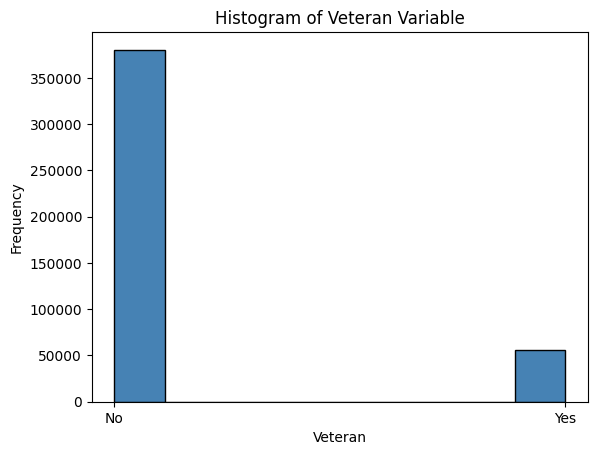

In [13]:
# Create a histogram
plt.hist(BRFSS_1['Veteran'], bins=9, color='steelblue', edgecolor='black')

# Add labels and title
plt.xlabel('Veteran')
plt.ylabel('Frequency')
plt.title('Histogram of Veteran Variable')

# Show the plot
plt.show()

#### 'GENHLTH'

In [14]:
# Print unique categories in the 'GENHLTH' variable
print(BRFSS_1['GENHLTH'].unique())

[2. 3. 5. 1. 4. 9. 7.]


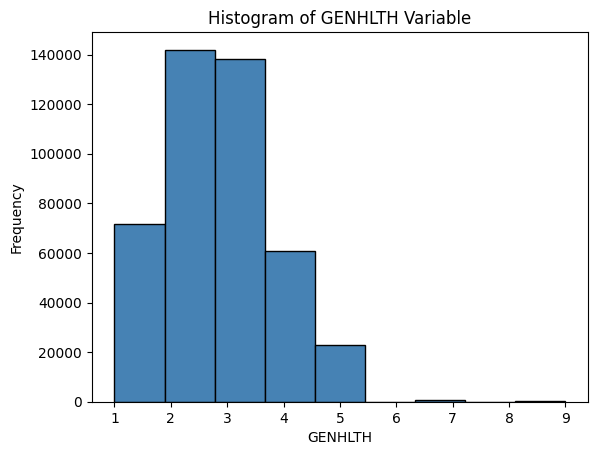

In [15]:
# Create a histogram
plt.hist(BRFSS_1['GENHLTH'], bins=9, color='steelblue', edgecolor='black')

# Add labels and title
plt.xlabel('GENHLTH')
plt.ylabel('Frequency')
plt.title('Histogram of GENHLTH Variable')

# Show the plot
plt.show()

In [16]:
# Keep only categories 1, 3, and 5 in the 'GENHLTH' variable
BRFSS_1 = BRFSS_1[(BRFSS_1['GENHLTH'] == 1) | (BRFSS_1['GENHLTH'] == 3) | (BRFSS_1['GENHLTH'] == 5)]

# Print unique categories in the 'GENHLTH' variable after filtering
print(BRFSS_1['GENHLTH'].unique())

[3. 5. 1.]


In [17]:
# Define mapping for categorical labels
category_mapping = {1: 'Excellent', 3: 'Good', 5: 'Poor'}

# Convert values to categorical labels
BRFSS_1['GeneralHealth'] = BRFSS_1['GENHLTH'].replace(category_mapping)

# Print unique categories in the 'GeneralHealth' variable after conversion
print(BRFSS_1['GeneralHealth'].unique())

['Good' 'Poor' 'Excellent']


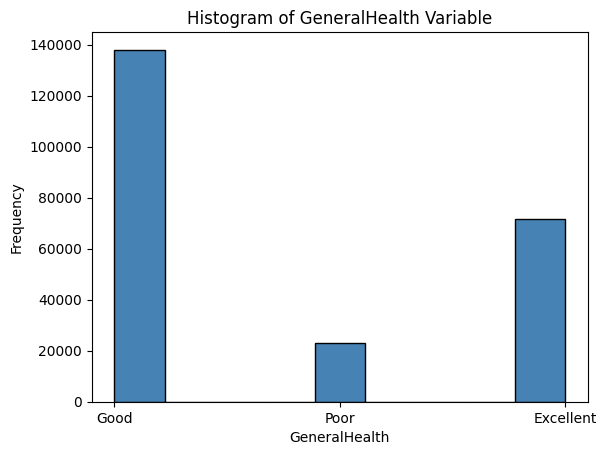

In [18]:
# Create a histogram
plt.hist(BRFSS_1['GeneralHealth'], bins=9, color='steelblue', edgecolor='black')

# Add labels and title
plt.xlabel('GeneralHealth')
plt.ylabel('Frequency')
plt.title('Histogram of GeneralHealth Variable')

# Show the plot
plt.show()

#### 'EDUCA'

In [19]:
# Print unique categories in the 'EDUCA' variable
print(BRFSS_1['EDUCA'].unique())

[6. 4. 5. 3. 9. 2. 1.]


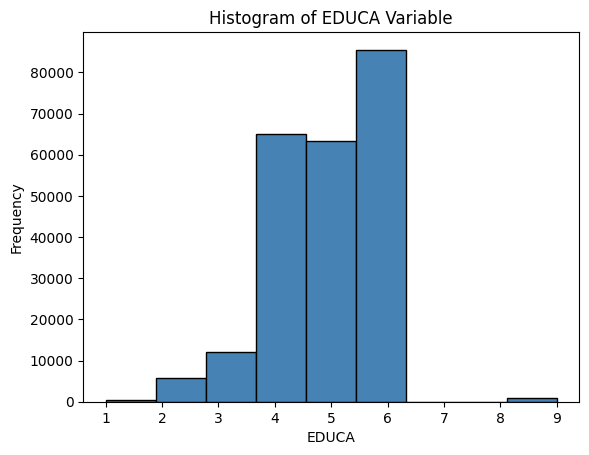

In [20]:
# Create a histogram
plt.hist(BRFSS_1['EDUCA'], bins=9, color='steelblue', edgecolor='black')

# Add labels and title
plt.xlabel('EDUCA')
plt.ylabel('Frequency')
plt.title('Histogram of EDUCA Variable')

# Show the plot
plt.show()

In [21]:
# Keep only categories 2, 3, 4, 5, and 6 in the 'EDUCA' variable
BRFSS_1 = BRFSS_1[(BRFSS_1['EDUCA'] >= 2) & (BRFSS_1['EDUCA'] <= 6)]

# Print unique categories in the 'EDUCA' variable after filtering
print(BRFSS_1['EDUCA'].unique())

[6. 4. 5. 3. 2.]


In [22]:
# Define the mapping of categories to educational levels
edu_mapping = {
    2: 'Elementary',
    3: 'High_School',
    4: 'High_School',
    5: 'College',
    6: 'College'
}

# Convert 'EDUCA' to categorical based on the defined mapping
BRFSS_1['Education'] = BRFSS_1['EDUCA'].replace(edu_mapping)

# Drop the original 'EDUCA' column
BRFSS_1.drop(columns=['EDUCA'], inplace=True)

# Print unique categories in the 'Education' variable after conversion
print(BRFSS_1['Education'].unique())

['College' 'High_School' 'Elementary']


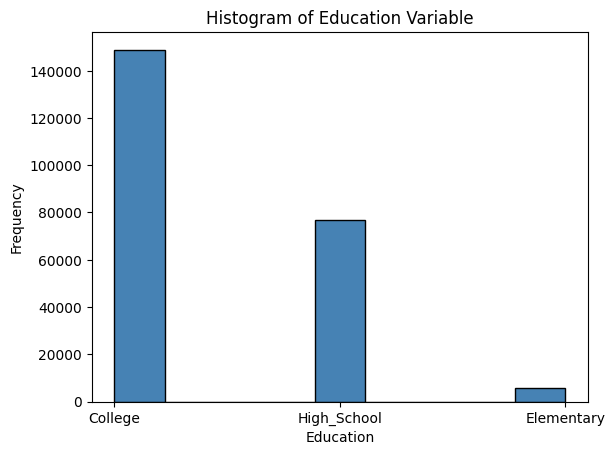

In [23]:
# Create a histogram
plt.hist(BRFSS_1['Education'], bins=9, color='steelblue', edgecolor='black')

# Add labels and title
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Histogram of Education Variable')

# Show the plot
plt.show()

#### '_AGE80'

In [24]:
# Print unique categories in the '_AGE80' variable
print(BRFSS_1['_AGE80'].unique())

[33. 76. 66. 78. 48. 80. 59. 49. 75. 68. 71. 50. 57. 62. 63. 72. 70. 65.
 64. 38. 56. 67. 77. 46. 58. 34. 54. 42. 73. 30. 53. 69. 35. 79. 37. 74.
 29. 31. 19. 39. 45. 60. 61. 40. 55. 27. 43. 44. 36. 51. 52. 32. 20. 26.
 41. 47. 23. 22. 18. 28. 25. 21. 24.]


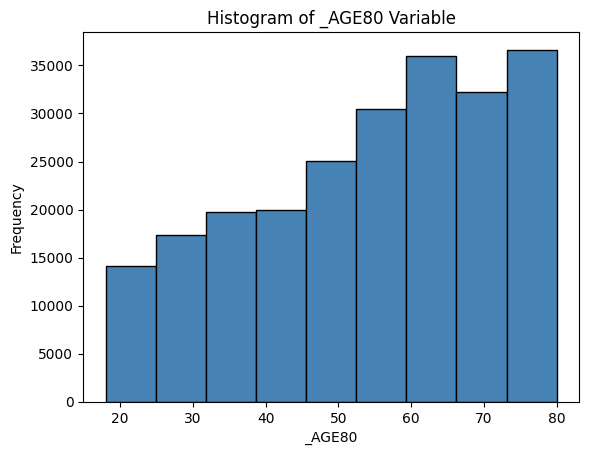

In [25]:
# Create a histogram
plt.hist(BRFSS_1['_AGE80'], bins=9, color='steelblue', edgecolor='black')

# Add labels and title
plt.xlabel('_AGE80')
plt.ylabel('Frequency')
plt.title('Histogram of _AGE80 Variable')

# Show the plot
plt.show()

In [26]:
# Create a new column 'Age_Group' with the age groups
BRFSS_1.loc[BRFSS_1['_AGE80'].between(18, 34), 'Age_Group'] = '18_to_34' #ages between 18-34
BRFSS_1.loc[BRFSS_1['_AGE80'].between(35, 54), 'Age_Group'] = '35_to_54'#ages between 35-54
BRFSS_1.loc[BRFSS_1['_AGE80'] >= 55, 'Age_Group'] = '55' # 55 = ages 55 and up

# Convert 'Age_Group' to categorical
BRFSS_1['Age_Group'] = BRFSS_1['Age_Group'].astype('category')

# Print unique categories in the 'Age_Group' column after conversion
print(BRFSS_1['Age_Group'].unique())

['18_to_34', '55', '35_to_54']
Categories (3, object): ['18_to_34', '35_to_54', '55']


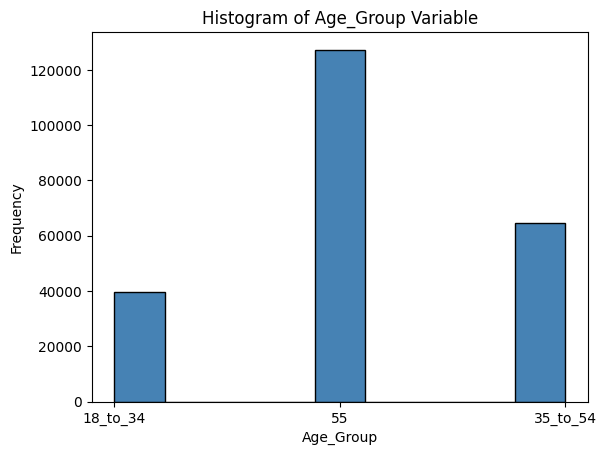

In [27]:
# Create a histogram
plt.hist(BRFSS_1['Age_Group'], bins=9, color='steelblue', edgecolor='black')

# Add labels and title
plt.xlabel('Age_Group')
plt.ylabel('Frequency')
plt.title('Histogram of Age_Group Variable')

# Show the plot
plt.show()

#### '_MENT14D'

In [28]:
# Print unique categories in the 'MENTHLTH' variable
print(BRFSS_1['_MENT14D'].unique())

[1. 2. 3. 9.]


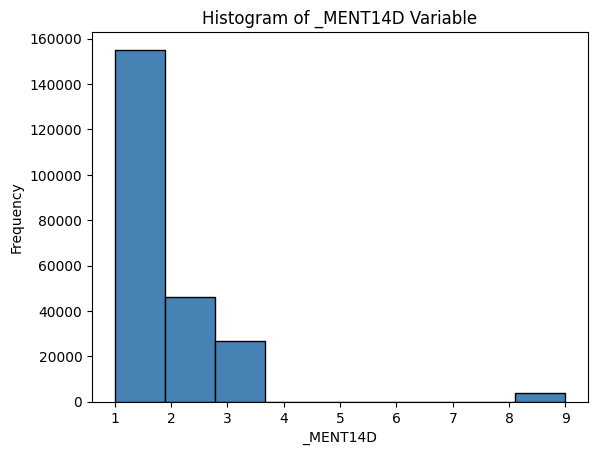

In [29]:
# Create a histogram
plt.hist(BRFSS_1['_MENT14D'], bins=9, color='steelblue', edgecolor='black')

# Add labels and title
plt.xlabel('_MENT14D')
plt.ylabel('Frequency')
plt.title('Histogram of _MENT14D Variable')

# Show the plot
plt.show()

In [30]:
# Convert 'MENTHLTH' column to numeric type
BRFSS_1['MentalHealth'] = pd.to_numeric(BRFSS_1['_MENT14D'], errors='coerce')

# Assign categories between 0 and 13 to '0= 0-13 days' and categories 14 and above to '1= 14+ days'
BRFSS_1['MentalHealth'] = BRFSS_1['MentalHealth'].apply(lambda x: '0' if x <= 13 else ('1' if x >= 14 else None))

# Print unique values of the 'MentalHealth' column after modification
print(BRFSS_1['MentalHealth'].unique())

['0']


In [31]:
# Filter out rows where _MENT14D is equal to 9
BRFSS_1 = BRFSS_1[BRFSS_1['_MENT14D'] != 9]

# Define a mapping dictionary for relabeling categories
mapping = {
    1 : 0, #Combine categories 1 and 2 into 0
    2 : 0,
    3 : 1 #Relabeling category 3 to 1
}

# Apply the mapping to the '_MENT14D' variable
BRFSS_1['MentalHealth'] = BRFSS_1['_MENT14D'].map(mapping)

# Print the unique categories in the MentalHealth variable after transformation
print(BRFSS_1['MentalHealth'].unique())

[0 1]


In [32]:
BRFSS_1['MentalHealth'].value_counts()

# 0 = 0-13 days
# 1 = 14+ days

MentalHealth
0    201278
1     26699
Name: count, dtype: int64

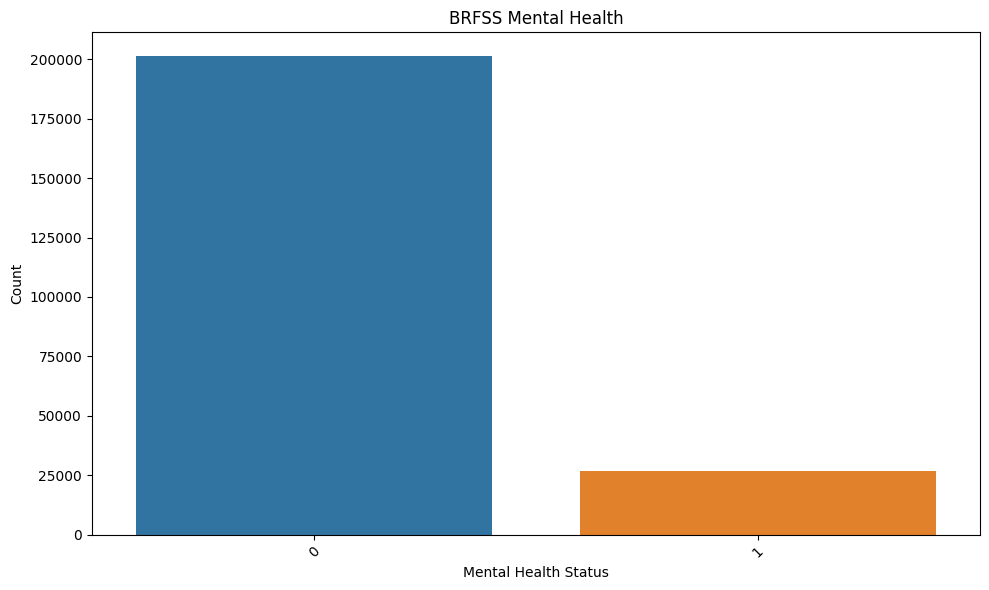

In [33]:
# Example of creating a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='MentalHealth', data=BRFSS_1)
plt.title('BRFSS Mental Health')
plt.xlabel('Mental Health Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()
plt.show()

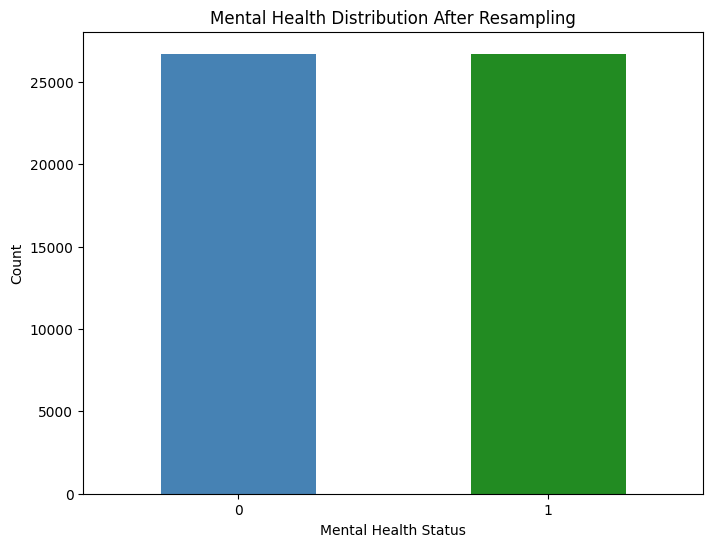

In [34]:
# Balance the target variable

# Separate features and target variable
X = BRFSS_1.drop('MentalHealth', axis=1)
y = BRFSS_1['MentalHealth']

# Initialize and fit to the data
rus = RandomUnderSampler(random_state=1234)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Calculate the class distribution after resampling
mental_health_resampled_counts = pd.Series(y_resampled).value_counts()

# Plot the bar plot
plt.figure(figsize=(8, 6))
mental_health_resampled_counts.plot(kind='bar', color=['steelblue', 'forestgreen'])
plt.title('Mental Health Distribution After Resampling')
plt.xlabel('Mental Health Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.show()

In [35]:
#Combine X_resampled and y_resampled back into a new DataFrame
resampled_df = pd.concat([X_resampled, y_resampled], axis=1)

#Verify
print(resampled_df['MentalHealth'].value_counts())

MentalHealth
0    26699
1    26699
Name: count, dtype: int64


In [36]:
BRFSS_2 = resampled_df.copy()

In [37]:
print(BRFSS_2)

        VETERAN3  GENHLTH  _AGE80  _MENT14D Veteran GeneralHealth  \
256430       2.0      5.0    64.0       1.0      No          Poor   
289651       2.0      1.0    19.0       1.0      No     Excellent   
357377       2.0      5.0    62.0       1.0      No          Poor   
347280       2.0      1.0    60.0       1.0      No     Excellent   
341631       2.0      1.0    76.0       1.0      No     Excellent   
...          ...      ...     ...       ...     ...           ...   
437362       2.0      5.0    55.0       3.0      No          Poor   
437372       1.0      3.0    36.0       3.0     Yes          Good   
437416       2.0      1.0    20.0       3.0      No     Excellent   
437431       2.0      1.0    73.0       3.0      No     Excellent   
437435       2.0      3.0    49.0       3.0      No          Good   

          Education Age_Group  MentalHealth  
256430      College        55             0  
289651  High_School  18_to_34             0  
357377  High_School        55    

In [38]:
# Drop the specified columns
BRFSS_2.drop(columns=['VETERAN3', 'GENHLTH', '_AGE80', '_MENT14D'], inplace=True)

# Print the DataFrame after dropping the columns
print(BRFSS_2)

       Veteran GeneralHealth    Education Age_Group  MentalHealth
256430      No          Poor      College        55             0
289651      No     Excellent  High_School  18_to_34             0
357377      No          Poor  High_School        55             0
347280      No     Excellent  High_School        55             0
341631      No     Excellent      College        55             0
...        ...           ...          ...       ...           ...
437362      No          Poor      College        55             1
437372     Yes          Good      College  35_to_54             1
437416      No     Excellent  High_School  18_to_34             1
437431      No     Excellent      College        55             1
437435      No          Good      College  35_to_54             1

[53398 rows x 5 columns]


# Pearson Chi-Square Test
#### Exposure Variable: Age_Group
#### Control Variables: Veteran, GeneralHealth,and Education

#### Chi-Square test for 'Age_Group' and 'Veteran'

In [39]:
# Create contingency table between 'Age_Group' and 'Veteran'
contingency_agegroup_veteran = pd.crosstab(BRFSS_2['Age_Group'], BRFSS_2['Veteran'])

# Perform chi-square test for 'Age_Group' and 'Veteran'
chi2_agegroup_veteran, p_agegroup_veteran, dof_agegroup_veteran, expected_agegroup_veteran = chi2_contingency(contingency_agegroup_veteran)

# Print results
print("Chi-square statistic for Age_Group and Veteran:", chi2_agegroup_veteran)
print("p-value for Age_Group and Veteran:", p_agegroup_veteran)
print("Degrees of freedom for Age_Group and Veteran:", dof_agegroup_veteran)
print("Expected frequencies for Age_Group and Veteran:\n", expected_agegroup_veteran)

Chi-square statistic for Age_Group and Veteran: 1043.750511880304
p-value for Age_Group and Veteran: 2.251417841420238e-227
Degrees of freedom for Age_Group and Veteran: 2
Expected frequencies for Age_Group and Veteran:
 [[ 9167.86662422  1283.13337578]
 [13926.80609761  1949.19390239]
 [23747.32727818  3323.67272182]]


#### Chi-Square test for 'Age_Group' and 'GeneralHealth'

In [40]:
# Create contingency table between 'Age_Group' and 'GeneralHealth'
contingency_agegroup_generalhealth = pd.crosstab(BRFSS_2['Age_Group'], BRFSS_2['GeneralHealth'])

# Perform chi-square test for 'Age_Group' and 'GeneralHealth'
chi2_agegroup_generalhealth, p_agegroup_generalhealth, dof_agegroup_generalhealth, expected_agegroup_generalhealth = chi2_contingency(contingency_agegroup_generalhealth)

# Print results
print("Chi-square statistic for Age_Group and GeneralHealth:", chi2_agegroup_generalhealth)
print("p-value for Age_Group and GeneralHealth:", p_agegroup_generalhealth)
print("Degrees of freedom for Age_Group and GeneralHealth:", dof_agegroup_generalhealth)
print("Expected frequencies for Age_Group and GeneralHealth:\n", expected_agegroup_generalhealth)

Chi-square statistic for Age_Group and GeneralHealth: 1890.548690661924
p-value for Age_Group and GeneralHealth: 0.0
Degrees of freedom for Age_Group and GeneralHealth: 4
Expected frequencies for Age_Group and GeneralHealth:
 [[ 2314.9636316   5972.36347803  2163.67289037]
 [ 3516.63597888  9072.55215551  3286.81186561]
 [ 5996.40038953 15470.08436646  5604.51524402]]


#### Chi-Square test for 'Age_Group' and 'Education'

In [41]:
# Create contingency table between 'Age_Group' and 'Education'
contingency_agegroup_education = pd.crosstab(BRFSS_2['Age_Group'], BRFSS_2['Education'])

# Perform chi-square test for 'Age_Group' and 'Education'
chi2_agegroup_education, p_agegroup_education, dof_agegroup_education, expected_agegroup_education = chi2_contingency(contingency_agegroup_education)

# Print results
print("Chi-square statistic for Age_Group and Education:", chi2_agegroup_education)
print("p-value for Age_Group and Education:", p_agegroup_education)
print("Degrees of freedom for Age_Group and Education:", dof_agegroup_education)
print("Expected frequencies for Age_Group and Education:\n", expected_agegroup_education)

Chi-square statistic for Age_Group and Education: 111.64454093234268
p-value for Age_Group and Education: 3.244998887254958e-23
Degrees of freedom for Age_Group and Education: 4
Expected frequencies for Age_Group and Education:
 [[ 6319.1774411    294.55700588  3837.26555302]
 [ 9599.39346043   447.45833177  5829.1482078 ]
 [16368.42909847   762.98466235  9939.58623918]]


# Pearson Chi-Square Test
#### Dependent Variable: MentalHealth
#### Independent Variables: Veteran, Age_Group, GeneralHealth, and Education

#### Chi-Square test for 'MentalHealth' and 'Veteran'

In [42]:
# Create contingency table between 'MentalHealth' and 'Veteran'
contingency_mentalhealth_veteran = pd.crosstab(BRFSS_2['MentalHealth'], BRFSS_2['Veteran'])

# Perform chi-square test for 'MentalHealth' and 'Veteran'
chi2_mentalhealth_veteran, p_mentalhealth_veteran, dof_mentalhealth_veteran, expected_mentalhealth_veteran = chi2_contingency(contingency_mentalhealth_veteran)

# Print results
print("Chi-square statistic for MentalHealth and Veteran:", chi2_mentalhealth_veteran)
print("p-value for MentalHealth and Veteran:", p_mentalhealth_veteran)
print("Degrees of freedom for MentalHealth and Veteran:", dof_mentalhealth_veteran)
print("Expected frequencies for MentalHealth and Veteran:\n", expected_mentalhealth_veteran)

Chi-square statistic for MentalHealth and Veteran: 55.506968872732735
p-value for MentalHealth and Veteran: 9.312827700713384e-14
Degrees of freedom for MentalHealth and Veteran: 1
Expected frequencies for MentalHealth and Veteran:
 [[23421.  3278.]
 [23421.  3278.]]


#### Chi-Square test for 'MentalHealth' and 'Age_Group'

In [43]:
# Create contingency table between 'MentalHealth' and 'Age_Group'
contingency_mentalhealth_age_group = pd.crosstab(BRFSS_2['MentalHealth'], BRFSS_2['Age_Group'])

# Perform chi-square test for 'MentalHealth' and 'Age_Group'
chi2_mentalhealth_age_group, p_mentalhealth_age_group, dof_mentalhealth_age_group, expected_mentalhealth_age_group = chi2_contingency(contingency_mentalhealth_age_group)

# Print results
print("Chi-square statistic for MentalHealth and Age_Group:", chi2_mentalhealth_age_group)
print("p-value for MentalHealth and Age_Group:", p_mentalhealth_age_group)
print("Degrees of freedom for MentalHealth and Age_Group:", dof_mentalhealth_age_group)
print("Expected frequencies for MentalHealth and Age_Group:\n", expected_mentalhealth_age_group)

Chi-square statistic for MentalHealth and Age_Group: 719.6692007573367
p-value for MentalHealth and Age_Group: 5.318861205891991e-157
Degrees of freedom for MentalHealth and Age_Group: 2
Expected frequencies for MentalHealth and Age_Group:
 [[ 5225.5  7938.  13535.5]
 [ 5225.5  7938.  13535.5]]


#### Chi-Square test for 'MentalHealth' and 'GeneralHealth'

In [44]:
# Create contingency table between 'MentalHealth' and 'GeneralHealth'
contingency_mentalhealth_generalhealth = pd.crosstab(BRFSS_2['MentalHealth'], BRFSS_2['GeneralHealth'])

# Perform chi-square test for 'MentalHealth' and 'GeneralHealth'
chi2_mentalhealth_generalhealth, p_mentalhealth_generalhealth, dof_mentalhealth_generalhealth, expected_mentalhealth_generalhealth = chi2_contingency(contingency_mentalhealth_generalhealth)

# Print results
print("Chi-square statistic for MentalHealth and GeneralHealth:", chi2_mentalhealth_generalhealth)
print("p-value for MentalHealth and GeneralHealth:", p_mentalhealth_generalhealth)
print("Degrees of freedom for MentalHealth and GeneralHealth:", dof_mentalhealth_generalhealth)
print("Expected frequencies for MentalHealth and GeneralHealth:\n", expected_mentalhealth_generalhealth)

Chi-square statistic for MentalHealth and GeneralHealth: 8512.995975268062
p-value for MentalHealth and GeneralHealth: 0.0
Degrees of freedom for MentalHealth and GeneralHealth: 2
Expected frequencies for MentalHealth and GeneralHealth:
 [[ 5914.  15257.5  5527.5]
 [ 5914.  15257.5  5527.5]]


#### Chi-Square test for 'MentalHealth' and 'Education'

In [45]:
# Create contingency table between 'MentalHealth' and 'Education'
contingency_mentalhealth_education = pd.crosstab(BRFSS_2['MentalHealth'], BRFSS_2['Education'])

# Perform chi-square test for 'MentalHealth' and 'Education'
chi2_mentalhealth_education, p_mentalhealth_education, dof_mentalhealth_education, expected_mentalhealth_education = chi2_contingency(contingency_mentalhealth_education)

# Print results
print("Chi-square statistic for MentalHealth and Education:", chi2_mentalhealth_education)
print("p-value for MentalHealth and Education:", p_mentalhealth_education)
print("Degrees of freedom for MentalHealth and Education:", dof_mentalhealth_education)
print("Expected frequencies for MentalHealth and Education:\n", expected_mentalhealth_education)

Chi-square statistic for MentalHealth and Education: 558.5283614805286
p-value for MentalHealth and Education: 5.213235107552583e-122
Degrees of freedom for MentalHealth and Education: 2
Expected frequencies for MentalHealth and Education:
 [[16143.5   752.5  9803. ]
 [16143.5   752.5  9803. ]]


# Analysis of Variance (ANOVA)
#### Dependent Variable: MentalHealth
#### Independent Variables: Veteran, Age_Group, GeneralHealth, and Education

### One-Hot Encoding

In [46]:
print(BRFSS_2.dtypes)

Veteran            object
GeneralHealth      object
Education          object
Age_Group        category
MentalHealth        int64
dtype: object


In [47]:
# Convert the column to numeric type
BRFSS_2['MentalHealth'] = pd.to_numeric(BRFSS_2['MentalHealth'])
print(BRFSS_2.dtypes)

Veteran            object
GeneralHealth      object
Education          object
Age_Group        category
MentalHealth        int64
dtype: object


In [48]:
# Perform one-hot encoding for categorical variables
BRFSS_3 = pd.get_dummies(BRFSS_2, columns=['Veteran', 'GeneralHealth', 'Education', 'Age_Group'])

# Check the data types after one-hot encoding
print(BRFSS_3.dtypes)

MentalHealth               int64
Veteran_No                  bool
Veteran_Yes                 bool
GeneralHealth_Excellent     bool
GeneralHealth_Good          bool
GeneralHealth_Poor          bool
Education_College           bool
Education_Elementary        bool
Education_High_School       bool
Age_Group_18_to_34          bool
Age_Group_35_to_54          bool
Age_Group_55                bool
dtype: object


In [49]:
print(BRFSS_3.columns)

Index(['MentalHealth', 'Veteran_No', 'Veteran_Yes', 'GeneralHealth_Excellent',
       'GeneralHealth_Good', 'GeneralHealth_Poor', 'Education_College',
       'Education_Elementary', 'Education_High_School', 'Age_Group_18_to_34',
       'Age_Group_35_to_54', 'Age_Group_55'],
      dtype='object')


In [50]:
# Define the formula for the ANOVA
formula = 'MentalHealth ~ C(Veteran_No) + C(Veteran_Yes) + C(GeneralHealth_Excellent) + C(GeneralHealth_Good) + C(GeneralHealth_Poor) + C(Education_College) + C(Education_Elementary) + C(Education_High_School) + C(Age_Group_18_to_34) + C(Age_Group_35_to_54) + C(Age_Group_55)'

In [51]:
# Fit the ANOVA model
model = ols(formula, data=BRFSS_3).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                                  sum_sq       df         F    PR(>F)
C(Veteran_No)                   0.739035      1.0  3.676704  0.055183
C(Veteran_Yes)                  0.739035      1.0  3.676704  0.055183
C(GeneralHealth_Excellent)      0.739035      1.0  3.676704  0.055183
C(GeneralHealth_Good)           0.739035      1.0  3.676704  0.055183
C(GeneralHealth_Poor)           0.739035      1.0  3.676704  0.055183
C(Education_College)            0.739035      1.0  3.676704  0.055183
C(Education_Elementary)         0.739035      1.0  3.676704  0.055183
C(Education_High_School)        0.739035      1.0  3.676704  0.055183
C(Age_Group_18_to_34)           0.739035      1.0  3.676704  0.055183
C(Age_Group_35_to_54)           0.739035      1.0  3.676704  0.055183
C(Age_Group_55)                 0.739035      1.0  3.676704  0.055183
Residual                    10731.639615  53390.0       NaN       NaN


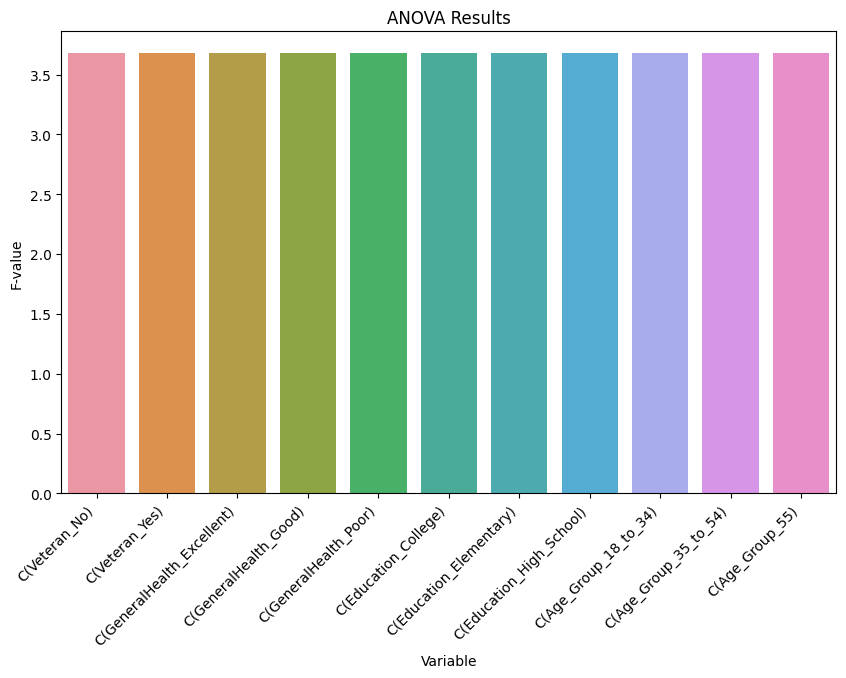

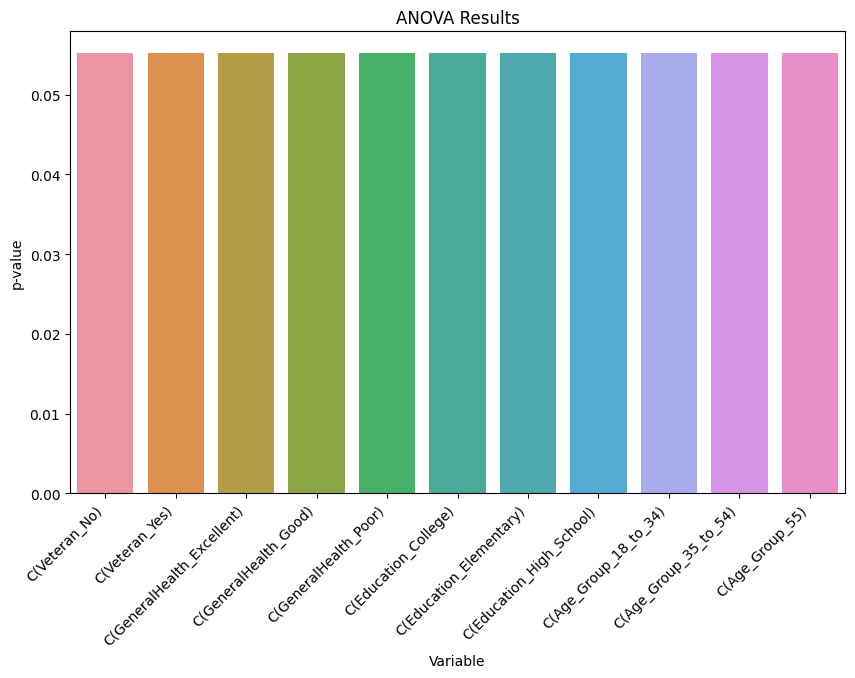

In [52]:
# Exclude the "Residual" row from the ANOVA table
anova_table_plot = anova_table.drop(index='Residual')

# Plot the ANOVA results
plt.figure(figsize=(10, 6))
sns.barplot(x=anova_table_plot.index, y='F', data=anova_table_plot)
plt.title('ANOVA Results')
plt.xlabel('Variable')
plt.ylabel('F-value')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=anova_table_plot.index, y='PR(>F)', data=anova_table_plot)
plt.title('ANOVA Results')
plt.xlabel('Variable')
plt.ylabel('p-value')
plt.xticks(rotation=45, ha='right')
plt.show()

## Correlation Matrix

In [53]:
# Generate Correlation Matrix
correlation_matrix = BRFSS_3.corr()

# Print correlation matrix
print(correlation_matrix)

                         MentalHealth  Veteran_No  Veteran_Yes  \
MentalHealth                 1.000000    0.032298    -0.032298   
Veteran_No                   0.032298    1.000000    -1.000000   
Veteran_Yes                 -0.032298   -1.000000     1.000000   
GeneralHealth_Excellent     -0.272570    0.018991    -0.018991   
GeneralHealth_Good          -0.061949   -0.002247     0.002247   
GeneralHealth_Poor           0.355016   -0.016719     0.016719   
Education_College           -0.100162   -0.048311     0.048311   
Education_Elementary         0.041302    0.025094    -0.025094   
Education_High_School        0.087414    0.040386    -0.040386   
Age_Group_18_to_34           0.080006    0.091781    -0.091781   
Age_Group_35_to_54           0.054001    0.070437    -0.070437   
Age_Group_55                -0.112862   -0.137233     0.137233   

                         GeneralHealth_Excellent  GeneralHealth_Good  \
MentalHealth                           -0.272570           -0.061949 

In [54]:
# Find features that are correlated
correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        correlated_pairs.append((col1, col2, corr_value))

# Print out correlated pairs with their correlation coefficient
print("\nCorrelated pairs with their correlation coefficient:")
for col1, col2, corr_value in correlated_pairs:
    print(f"{col1} and {col2} have a correlation of {corr_value:.2f}")


Correlated pairs with their correlation coefficient:
MentalHealth and Veteran_No have a correlation of 0.03
MentalHealth and Veteran_Yes have a correlation of -0.03
MentalHealth and GeneralHealth_Excellent have a correlation of -0.27
MentalHealth and GeneralHealth_Good have a correlation of -0.06
MentalHealth and GeneralHealth_Poor have a correlation of 0.36
MentalHealth and Education_College have a correlation of -0.10
MentalHealth and Education_Elementary have a correlation of 0.04
MentalHealth and Education_High_School have a correlation of 0.09
MentalHealth and Age_Group_18_to_34 have a correlation of 0.08
MentalHealth and Age_Group_35_to_54 have a correlation of 0.05
MentalHealth and Age_Group_55 have a correlation of -0.11
Veteran_No and Veteran_Yes have a correlation of -1.00
Veteran_No and GeneralHealth_Excellent have a correlation of 0.02
Veteran_No and GeneralHealth_Good have a correlation of -0.00
Veteran_No and GeneralHealth_Poor have a correlation of -0.02
Veteran_No and 

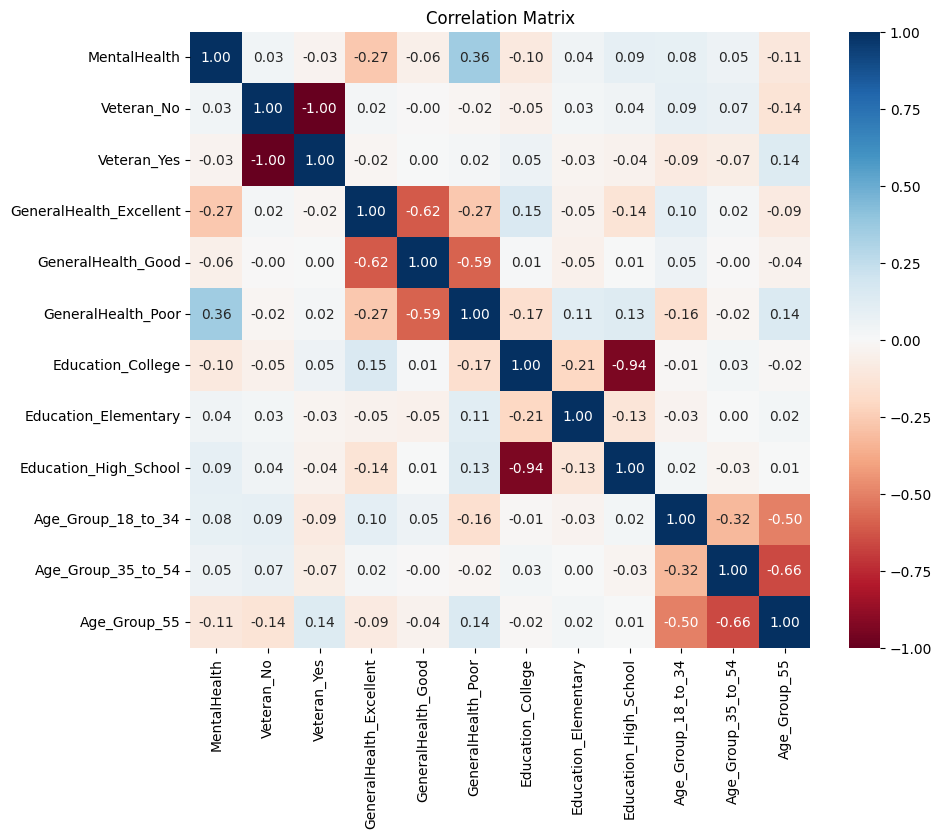

In [55]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f")

# Add title
plt.title('Correlation Matrix')

# Show plot
plt.show()

## Correlation Matrix with target variable

In [56]:
# Generate correlation matrix
correlation_matrix = BRFSS_3.corr()

# Get correlation of features with the target variable 'MentalHealth'
mentalhealth_correlation = correlation_matrix['MentalHealth'].drop('MentalHealth')

# Sort correlations in descending order
mentalhealth_correlation_sorted = mentalhealth_correlation.abs().sort_values(ascending=False)

# Print correlated features with the target variable 'MentalHealth'
print("Correlation of features with the target variable 'MentalHealth':")
for feature, corr_value in mentalhealth_correlation_sorted.items():
    print(f"{feature} and MentalHealth has a correlation of {corr_value:.2f}")

Correlation of features with the target variable 'MentalHealth':
GeneralHealth_Poor and MentalHealth has a correlation of 0.36
GeneralHealth_Excellent and MentalHealth has a correlation of 0.27
Age_Group_55 and MentalHealth has a correlation of 0.11
Education_College and MentalHealth has a correlation of 0.10
Education_High_School and MentalHealth has a correlation of 0.09
Age_Group_18_to_34 and MentalHealth has a correlation of 0.08
GeneralHealth_Good and MentalHealth has a correlation of 0.06
Age_Group_35_to_54 and MentalHealth has a correlation of 0.05
Education_Elementary and MentalHealth has a correlation of 0.04
Veteran_No and MentalHealth has a correlation of 0.03
Veteran_Yes and MentalHealth has a correlation of 0.03


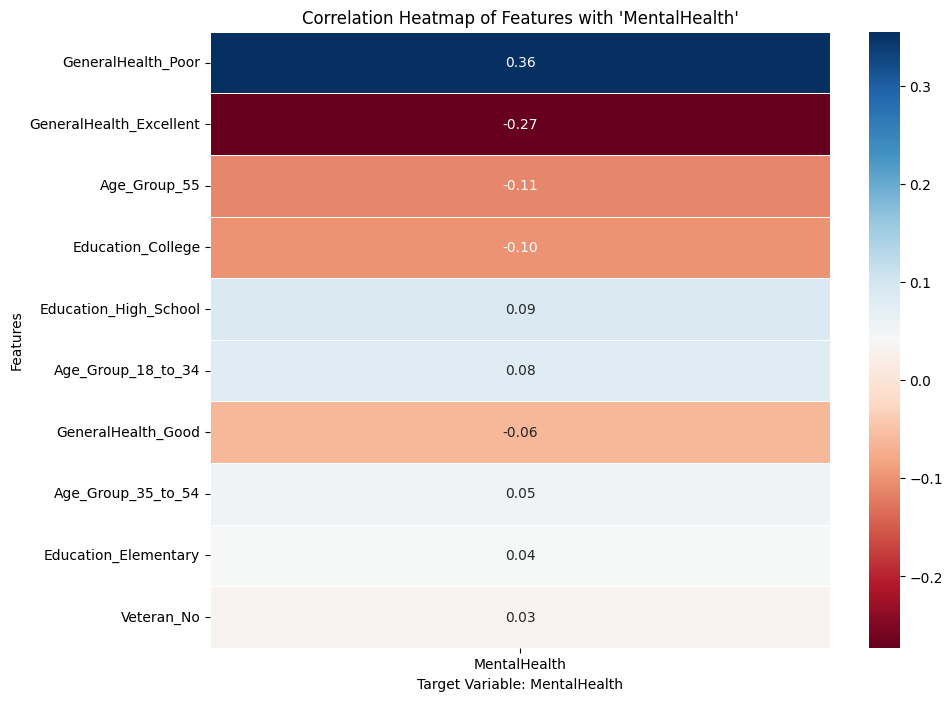

In [57]:
# Generate correlation matrix
correlation_matrix = BRFSS_3.corr()

# Get correlation of features with the target variable 'MentalHealth'
mentalhealth_correlation = correlation_matrix['MentalHealth'].drop('MentalHealth')

# Sort correlations in descending order
mentalhealth_correlation_sorted = mentalhealth_correlation.abs().sort_values(ascending=False)

# Select top correlated features (optional)
top_correlated_features = mentalhealth_correlation_sorted.index[:10]  # Select top 10 features

# Filter correlation matrix for top correlated features and target variable
correlation_subset = correlation_matrix.loc[top_correlated_features, ['MentalHealth']]

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_subset, annot=True, cmap='RdBu', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Features with 'MentalHealth'")
plt.xlabel("Target Variable: MentalHealth")
plt.ylabel("Features")
plt.show()

# Final Evaluation

#### **Pearson's Chi-Square Results:**
- **Age and Veteran Status:** The statistics and expected frequencies indicate that there is a significant relationship between age and veteran status with (p-value = 2.25e-227).

- **Age and General Health:** A significant relationship exists between age group and general health (p-value = 0.0), suggesting age plays a role in general health status.

- **Age and Education:** There is a statistically significant relationship between age group and education level (p-value = 3.24e-23), indicating age influences education. 

- **Mental Health and Veteran Status:** A significant relationship is found between mental health and veteran status (p-value = 9.31e-14).

- **Mental Health and Age:** There is a significant relationship between mental health and age (p-value = 5.32e-157). Suggesting that different age groups experience varying levels of mental health, with some age groups more prone to "no good" mental health days than others. 

- **Mental Health and General Health:** The relationship between mental health and general health is significant (p-value = 0.0).

- **Mental Health and Education:** There is a significant relationship between mental health and education (p-value = 5.21e-122).

#### **Analysis of Variance (ANOVA):**
- The ANOVA results indicate no significant differences across the different variables (Veteran, Age_Group, GeneralHealth, and Education) with respect to MentalHealth (all p-values > 0.05). This suggests that none of the individual factors considered in the analysis (Veteran, Age_Group, GeneralHealth, and Education) have a significant impact on mental health days when considered independently.

*Possible Explanations:*
- This could be because mental health is a complex and multifaceted issue, possibly influenced by the interplay of multiple factors rather than any single one. There could be other factors not considered in this analysis that may have a stronger impact.
- The effects of the variables might be intertwined, such that their combined impact on mental health is more significant than their individual contributions. This could lead to a lack of clear differences across individual variables.
- The sample size and distribution across the different categories may not have been large enough to detect small differences in mental health outcomes across the different groups.

*Future Directions:*
- Future research could explore the interaction effects between different variables, such as examining how combinations of age, education, general health, and veteran status impact mental health.
- Consider expanding the data collection to include additional factors such as income, employment status, or access to healthcare, which might influence mental health outcomes.

#### **Correlation Matrix between MentalHealth and the Independent Variables:**
- **Age_Group_55 and MentalHealth (0.11):** Shows a moderate correlation, suggesting that individuals in the age group 55 and older may have a slightly higher likelihood of experiencing "no good" mental health days.


- **Age_Group_18_to_34 and MentalHealth (0.08):** Shows a weaker correlation, suggesting that younger individuals in this age group may also experience some "no good" mental health days, but not as significantly as the older age group.
 
 
- **GeneralHealth_Poor and MentalHealth (0.36):** Indicates a strong positive relationship between individuals who report "poor" general health and the frequency of "no good" mental health days.
  - This correlation suggests that individuals with poor general health are more likely to experience more frequent "no good" mental health days.
 
 
- **GeneralHealth_Excellent and MentalHealth (0.27):** Suggests that individuals who report excellent general health are less likely to experience "no good" mental health days. However, the correlation is not as strong as for those with poor general health.


- **Education_College and MentalHealth (0.10) and Education_High_School and MentalHealth (0.09):** Suggests a slight association between education level and mental health days, with lower levels of education not potentially linked to more "no good" mental health days.

- **Veteran_No and Veteran_Yes with MentalHealth (0.03):** Both show very weak correlations with MentalHealth. This suggests that veteran status does not have a strong impact on the likelihood of experiencing "no good" mental health days.
 

Overall, ages 55+ and 18-34 experience more "no good" mental health days compared to the middle-aged group. Whereas general health plays a significant role, with those in "poor" health experiencing more "no good" mental health days. Lastly, veteran status and education appear to have relatively weaker relationships with mental health outcomes.

#### **Research Question:**
What ages experience the most "no good" mental health days?
- Individuals in the age group 55+ experience the most "no good" mental health days, as they have a moderately stronger positive correlation (0.11) with poor mental health days compared to the age group 18-34 with a weaker correlation (0.08). Indicating that while younger individuals may experience some "no good" mental health days, the impact is not as significant as it is for older individuals. Additionally, the relationship between age and general health may further impact mental health outcomes.


#### **Null Hypothesis (H0):**
Suggests there is no significant difference in the number of 'no good' mental health days reported across different age groups.
- We reject the Null Hypothesis (H0), as there is evidence suggesting a significant difference in 'no good' mental health days across different age groups.

#### **Alternative Hypothesis (H1):** 
Suggests there is a significant difference in the number of 'no good' mental health days reported across different age groups. 
- We accept the Alternative Hypothesis (H1), as there is evidence that there is a significant difference of 'no good' mental health days across different age groups.



Overall, age appears to be a critical factor in experiencing "no good" mental health days, particularly in age groups 55+ and 18-34. General health also plays a role in the number of "no good" mental health days across different age groups.


**As stated at the beginning of the project:**
- The National Alliance on Mental Health Illness found that 50% of all lifetime mental illnesses begin at the age of 14 and 75% begin at the age of 24 (2023).
  - These statistics suggest that mental health issues often begin at a young age, which aligns with the findings in this project that the age group 18-34 experiences a high likelihood of "no good" mental health days. It emphasizes the importance of early intervention and targeted support for younger individuals.
 
Understanding that mental health issues often begin in adolescence or early adulthood and can worsen in older age groups can help guide targeted interventions for these vulnerable populations. The increasing rate of mental health issues in recent years highlights the need for ongoing research and action to address underlying causes and provide adequate care and support. The correlation data suggests older individuals (55+) are more likely to experience "no good" mental health days, while younger individuals (18-34) also experience some negative mental health days. This aligns with The National Alliance on Mental Health Illness's findings regarding the onset of mental health issues beginning at a young age.

# References

Mental Health America. (2023). The State of Mental Health in America 2018. Mental Health America. Retrieved March 23, 2023, from https://www.mhanational.org/issues/state-mental-health-america-2018

National Alliance on Mental Illness. (n.d.). Mental Health Conditions. NAMI. Retrieved April 8, 2024, from https://www.nami.org/About-Mental-Illness/Mental-Health-Conditions

Terlizzi, E. P., & Zablotsky, B. (2020, September). Mental Health Treatment Among Adults: United States, 2019. PubMed. Retrieved April 8, 2024, from https://pubmed.ncbi.nlm.nih.gov/33054921/

The Blackberry Center. (2020, December 28). Mental Health Statistics in 2020 Compared to 2019 - BBC. The Blackberry Center. Retrieved March 27, 2023, from https://www.theblackberrycenter.com/mental-health-statistics-in-2020-compared-to-2019/
